# Importing files and libraries

In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import os

%matplotlib inline
plt.style.use('dark_background')

print(f"Seaborn version: {sns.__version__}")

Seaborn version: 0.13.2


In [622]:
df = pd.read_csv('TASK3-TRAIN.csv')
print("Initial shape:", df.shape)
df.head()

Initial shape: (58592, 44)


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


# Data Preprocessing

### Checking for Null Values

In [623]:
target = 'ncap_rating'

In [624]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius    

### Checking for Duplicates

In [625]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))
print(df.shape)


Number of duplicate rows: 0
(58592, 44)


### Checking the labled column

In [626]:
# I assume the NCap ration to be the one that is to be predicted, So I'll perform datacleaning with respect to it.
df[target].unique()

array([0, 2, 3, 5, 4], dtype=int64)

### Finding correlation in 'Number dtype' columns

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [628]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


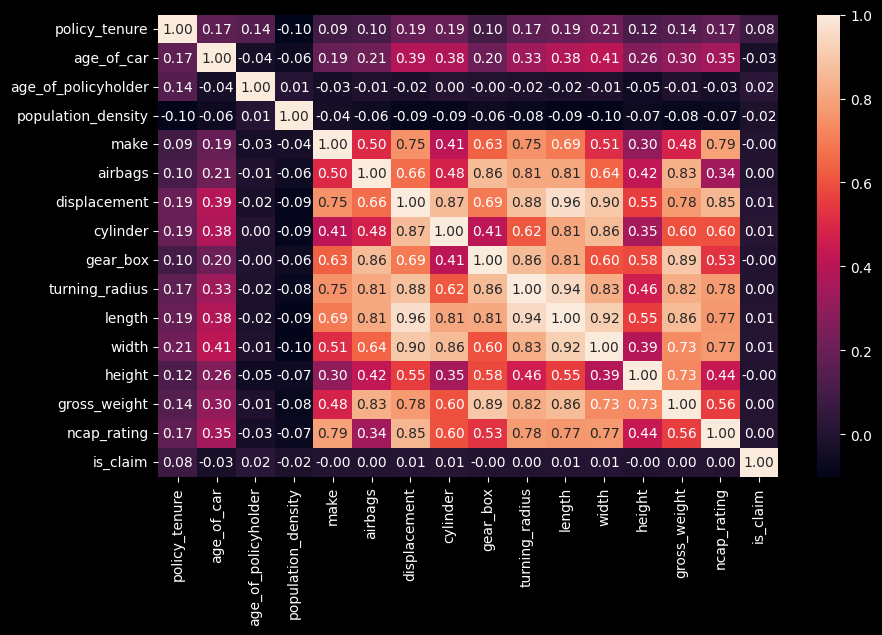

In [629]:
plt.figure(figsize=(10, 6))
columns = ['policy_tenure',	'age_of_car',	'age_of_policyholder',	'population_density',	'make',	'airbags',	'displacement',	'cylinder',	'gear_box',	'turning_radius',	'length',	'width',	'height',	'gross_weight',	'ncap_rating',	'is_claim']
sns.heatmap(df[columns].corr(), annot=True, fmt='.2f')
plt.show()

In [630]:
keep_columns = ['make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating']

# Filter the DataFrame
filtered_df = df[keep_columns]

print(filtered_df.head())

   make  airbags  displacement  cylinder  gear_box  turning_radius  length  \
0     1        2           796         3         5             4.6    3445   
1     1        2           796         3         5             4.6    3445   
2     1        2           796         3         5             4.6    3445   
3     1        2          1197         4         5             4.8    3995   
4     2        2           999         3         5             5.0    3731   

   width  gross_weight  ncap_rating  
0   1515          1185            0  
1   1515          1185            0  
2   1515          1185            0  
3   1735          1335            2  
4   1579          1155            2  


## Encoding

### Encoding columns that start with is_ (except is_claim)

In [631]:
from sklearn.preprocessing import LabelEncoder

# Identify columns starting with 'is_'
is_columns = [col for col in df.columns if col.startswith('is_')]
is_columns.remove('is_claim')

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each 'is_' column
for col in is_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [632]:
df[is_columns]

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1
58588,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
58589,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
58590,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1


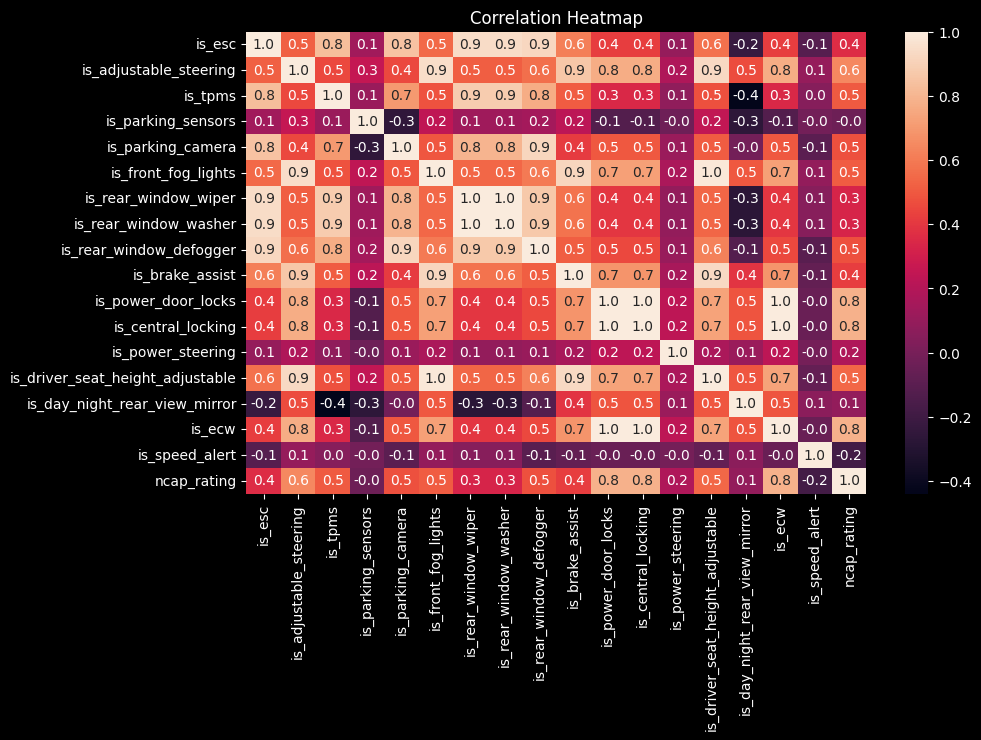

In [633]:
# Create a new DataFrame with 'is_' columns and 'ncap_rating'
correlation_data = df[is_columns + [target]]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt = '.1f')
plt.title('Correlation Heatmap')
plt.show()

In [634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

### Encoding columns with object data type

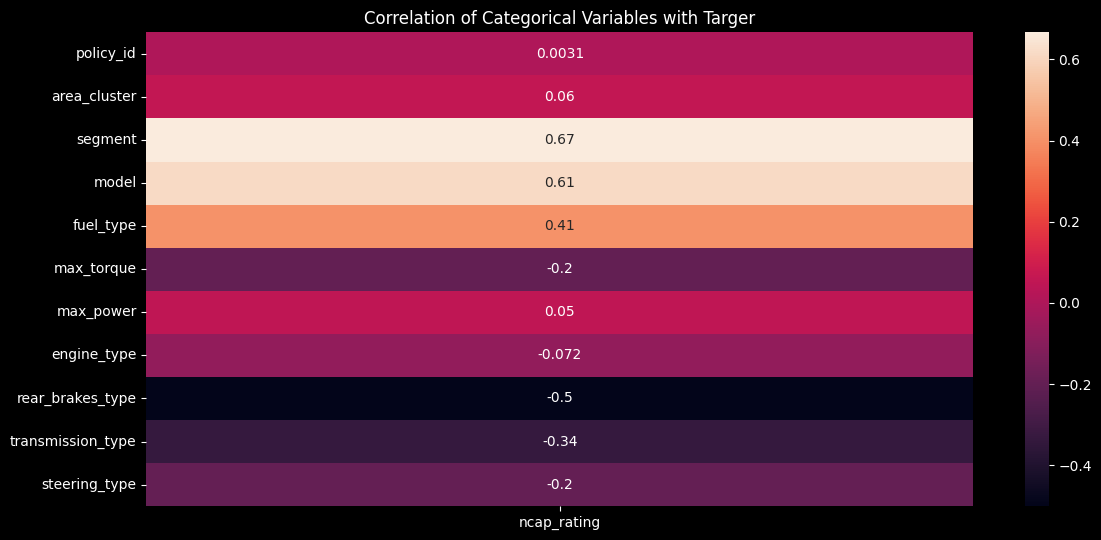

In [635]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

df_encoded = df[categorical_columns + [target]].copy()

le = LabelEncoder()

# Encode categorical variables
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

correlation_with_ncap = df_encoded.corr()[target].drop(target)

# Create the heatmap
plt.figure(figsize=(12, len(categorical_columns) * 0.5))
sns.heatmap(correlation_with_ncap.to_frame(), annot=True)
plt.title("Correlation of Categorical Variables with Targer")
plt.tight_layout()
plt.show()

In [636]:
# Select the desired columns
keep_columns = [
                'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 
                'is_central_locking', 'is_driver_seat_height_adjustable',
                'airbags', 'segment', 'model', 'fuel_type', 'ncap_rating'
                ]
df = df[keep_columns]

columns_to_encode = ['segment', 'model', 'fuel_type']

# Encode each column
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

df

,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,airbags,segment,model,fuel_type,ncap_rating
0,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,0,2,0,0,0,0
3,1,1,1,1,1,2,3,3,2,2
4,0,0,1,1,0,2,0,4,2,2
...,...,...,...,...,...,...,...,...,...,...
58587,0,0,1,1,0,2,0,4,2,2
58588,0,0,0,0,0,2,0,0,0,0
58589,0,0,0,0,0,2,0,0,0,0
58590,0,1,1,1,1,2,2,7,2,2


In [637]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   is_rear_window_defogger           58592 non-null  int32
 1   is_brake_assist                   58592 non-null  int32
 2   is_power_door_locks               58592 non-null  int32
 3   is_central_locking                58592 non-null  int32
 4   is_driver_seat_height_adjustable  58592 non-null  int32
 5   airbags                           58592 non-null  int64
 6   segment                           58592 non-null  int32
 7   model                             58592 non-null  int32
 8   fuel_type                         58592 non-null  int32
 9   ncap_rating                       58592 non-null  int64
dtypes: int32(8), int64(2)
memory usage: 2.7 MB


In [638]:
df.describe()

,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,airbags,segment,model,fuel_type,ncap_rating
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,0.350133,0.549171,0.724246,0.724246,0.585251,3.137066,1.938644,4.659237,1.003448,1.759950
std,0.477016,0.497581,0.446897,0.446897,0.492683,1.832641,1.566329,3.197355,0.835104,1.389576
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,7.000000,2.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,10.000000,2.000000,5.000000


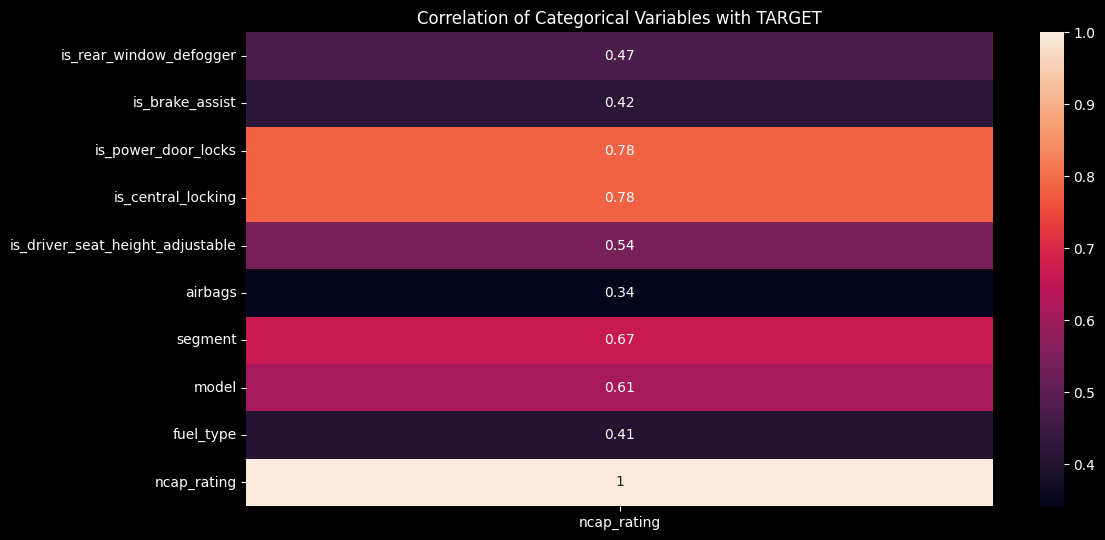

In [639]:

correlation_with_ncap = df.corr()[target]

# Create the heatmap
plt.figure(figsize=(12, len(categorical_columns) * 0.5))
sns.heatmap(correlation_with_ncap.to_frame(), annot=True)
plt.title("Correlation of Categorical Variables with TARGET")
plt.tight_layout()
plt.show()

In [640]:
features = keep_columns[:]
features.remove(target)
X = df[features]
y = df[target]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [641]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training

### Random Forest Classifier

In [642]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5815
           1       1.00      1.00      1.00      6355
           2       1.00      1.00      1.00      4217
           3       1.00      1.00      1.00       621
           4       1.00      1.00      1.00       570

    accuracy                           1.00     17578
   macro avg       1.00      1.00      1.00     17578
weighted avg       1.00      1.00      1.00     17578



### Logistic Regression

In [643]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [644]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['none', 'l2'],

}
log_reg = LogisticRegression(random_state=42, max_iter=1000)

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,scoring='accuracy', cv=2,n_jobs=-1,verbose=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nBest Model Performance:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pa

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Cross-Validation Score: 1.0

Best Model Performance:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5815
           1       1.00      1.00      1.00      6355
           2       1.00      1.00      1.00      4217
           3       1.00      1.00      1.00       621
           4       1.00      1.00      1.00       570

    accuracy                           1.00     17578
   macro avg       1.00      1.00      1.00     17578
weighted avg       1.00      1.00      1.00     17578



### XGBoost

In [645]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100,)
import joblib
model_path = 'xgb_model.pkl'
joblib.dump(xgb_clf, model_path)

print(f"Model saved to {model_path}")

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
smote=SMOTE()
rus=RandomUnderSampler()

X_resampled,y_resampled=smote.fit_resample(X_scaled,y)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.5,test_size=0.15, random_state=42, )

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
svc_clf = XGBClassifier(random_state=42)
svc_clf.fit(X_train_resampled, y_train_resampled)
from sklearn.metrics import classification_report
y_pred_svc = svc_clf.predict(X_test_resampled)
print(classification_report(y_test_resampled, y_pred_svc))

Model saved to xgb_model.pkl
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00      3244
           2       1.00      1.00      1.00      3200
           3       1.00      1.00      1.00      3209
           4       1.00      1.00      1.00      3119

    accuracy                           1.00     16052
   macro avg       1.00      1.00      1.00     16052
weighted avg       1.00      1.00      1.00     16052



### Confusion matrix

In [646]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5815    0    0    0    0]
 [   0 6355    0    0    0]
 [   0    0 4217    0    0]
 [   0    0    0  621    0]
 [   0    0    0    0  570]]


<Axes: >

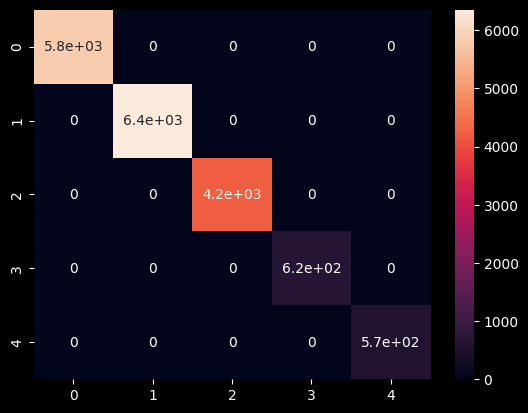

In [647]:
sns.heatmap(cm,annot=True)